# Минипроект 4

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Задание 1
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
# Загрузим датасет в переменную transaction_data

transaction_data = pd.read_csv('/Users/ola/Documents/Karpov/5. Практический кейс-анализ рекламных данных/transaction_data.csv')

In [3]:
# Посмотрим на вид датасета

transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
# Проверим размер датасета

transaction_data.shape

(5315, 3)

In [5]:
# Посмотрим на типы значений в колонках

transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [16]:
# Преобразуем колонку date к соответствующему типу данных

transaction_data = transaction_data.astype({'date': 'datetime64'})

In [17]:
transaction_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [18]:
# Посчитаем число пропущенных значений

transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

Пропущенных значений нет

In [23]:
# Проверим, есть ли в датасете дубликаты

transaction_data.drop_duplicates().shape

(5315, 3)

Дубликатов нет

In [22]:
# Посмотрим на описательную статистику

transaction_data.describe()

/var/folders/vh/1nv_fqgd74s1mbgz_mc8qysm0000gn/T/ipykernel_17102/803945839.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_data.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


### Задание 2
Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.


In [27]:
# Посмотрим на все уникальные значения, которые хранятся в колонке transaction

transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

В колонке transaction находятся три типа значений: successfull, cancelled и error

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transaction', ylabel='count'>

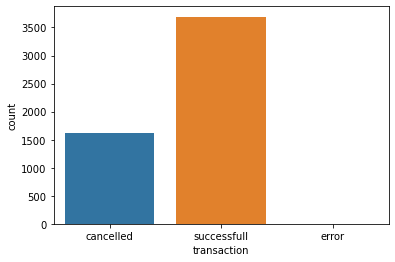

In [40]:
sns.countplot(transaction_data.transaction)

In [30]:
# Улучшим график с помощью логарифмической шкалы так, чтобы был виден столбец error

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transaction', ylabel='count'>

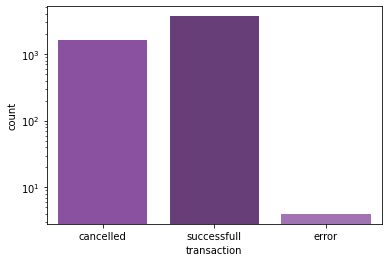

In [43]:
plt.pyplot.semilogy()
sns.countplot(transaction_data.transaction, palette = ['#8E44AD', '#6C3483', '#A569BD'])

### Задание 3
Сколько транзакций завершились ошибкой?

In [45]:
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

4 транзакции завершились ошибкой

### Задание 4
Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [112]:
successfull_transactions = transaction_data.query('transaction == "successfull"')\
                                            .groupby('name')\
                                            .agg({'transaction': 'count'})\
                                            .rename(columns = {'transaction': 'trasactions_count'})
                                                
successfull_transactions.head()

,trasactions_count
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68


/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

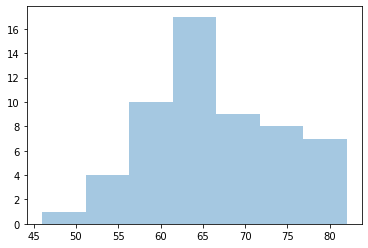

In [83]:
sns.distplot(successfull_transactions, kde = False)

In [84]:
successfull_transactions.describe()

,trasactions_count
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


Можно заметить:
- Пользователи в среднем совершили по 66 транзакций
- |Максимальное число успешных транзакций - 82    
    

### Задание 5
Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)

Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [164]:
# Импортируем данные в переменную transaction_data_updated

transaction_data_updated = pd.read_csv('/Users/ola/Documents/Karpov/5. Практический кейс-анализ рекламных данных/transaction_data_updated.csv')

In [165]:
# Посмотрим на вид датасета

transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [166]:
transaction_data_updated.shape

(5315, 4)

In [167]:
# Преобразуем данные и звпишем в переменную transaction_data_updated_temp

transaction_data_updated_temp = transaction_data_updated.groupby(['minute', 'name'], as_index = False) \
                                                        .agg({'transaction': 'count'}) \
                                                        .rename(columns = {'transaction': 'transaction_number'})

transaction_data_updated_temp

,minute,name,transaction_number
0,0,Ekaterina_Fedorova,3
1,0,Ekaterina_Ivanova,4
2,0,Ekaterina_Lesnova,2
3,0,Ekaterina_Ozerova,3
4,0,Ekaterina_Petrova,4
...,...,...,...
2573,59,Vasilisa_Fedorova,2
2574,59,Vasilisa_Ivanova,1
2575,59,Vasilisa_Lesnova,2
2576,59,Vasilisa_Ozerova,2


In [168]:
# Построим сводную таблицу и запишем в переменную user_vs_minute_pivot

user_vs_minute_pivot = transaction_data_updated_temp.pivot(
                                                           index=["minute"],
                                                           values=["transaction_number"],
                                                           columns=["name"]
                                                          )

user_vs_minute_pivot.head()

transaction_number                                      \
name   Ekaterina_Fedorova Ekaterina_Ivanova Ekaterina_Lesnova   
minute                                                          
0                     3.0               4.0               2.0   
1                     4.0               4.0               NaN   
2                     1.0               2.0               4.0   
3                     3.0               NaN               2.0   
4                     3.0               NaN               NaN   

                                                                \
name   Ekaterina_Ozerova Ekaterina_Petrova Ekaterina_Polyanova   
minute                                                           
0                    3.0               4.0                 4.0   
1                    4.0               2.0                 5.0   
2                    4.0               2.0                 1.0   
3                    NaN               5.0                 2.0   
4                    3.0               1.0                 1.0   

                                                                      ...  \
name   Ekaterina_Smirnova Irina_Fedorova Irina_Ivanova Irina_Lesnova  ...   
minute                                                                ...   
0                     2.0            1.0           2.0           2.0  ...   
1                     4.0            4.0           4.0           3.0  ...   
2                     3.0            2.0           3.0           3.0  ...   
3                     1.0            3.0           2.0           2.0  ...   
4                     2.0            3.0           2.0           1.0  ...   

                                                              \
name   Svetlana_Petrova Svetlana_Polyanova Svetlana_Smirnova   
minute                                                         
0                   NaN                3.0               1.0   
1                   4.0                5.0               3.0   
2                   4.0                1.0               3.0   
3                   1.0                5.0               5.0   
4                   1.0                2.0               2.0   

                                                                             \
name   Vasilisa_Fedorova Vasilisa_Ivanova Vasilisa_Lesnova Vasilisa_Ozerova   
minute                                                                        
0                    1.0              4.0              1.0              3.0   
1                    2.0              3.0              3.0              NaN   
2                    3.0              NaN              1.0              2.0   
3                    2.0              4.0              NaN              3.0   
4                    1.0              1.0              2.0              2.0   

                                                              
name   Vasilisa_Petrova Vasilisa_Polyanova Vasilisa_Smirnova  
minute                                                        
0                   NaN                NaN               1.0  
1                   NaN                3.0               2.0  
2                   1.0                3.0               1.0  
3                   4.0                1.0               NaN  
4                   3.0                NaN               1.0  

[5 rows x 56 columns]

In [169]:
# Заменим все NaN на 0

user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

user_vs_minute_pivot.head()

transaction_number                                      \
name   Ekaterina_Fedorova Ekaterina_Ivanova Ekaterina_Lesnova   
minute                                                          
0                     3.0               4.0               2.0   
1                     4.0               4.0               0.0   
2                     1.0               2.0               4.0   
3                     3.0               0.0               2.0   
4                     3.0               0.0               0.0   

                                                                \
name   Ekaterina_Ozerova Ekaterina_Petrova Ekaterina_Polyanova   
minute                                                           
0                    3.0               4.0                 4.0   
1                    4.0               2.0                 5.0   
2                    4.0               2.0                 1.0   
3                    0.0               5.0                 2.0   
4                    3.0               1.0                 1.0   

                                                                      ...  \
name   Ekaterina_Smirnova Irina_Fedorova Irina_Ivanova Irina_Lesnova  ...   
minute                                                                ...   
0                     2.0            1.0           2.0           2.0  ...   
1                     4.0            4.0           4.0           3.0  ...   
2                     3.0            2.0           3.0           3.0  ...   
3                     1.0            3.0           2.0           2.0  ...   
4                     2.0            3.0           2.0           1.0  ...   

                                                              \
name   Svetlana_Petrova Svetlana_Polyanova Svetlana_Smirnova   
minute                                                         
0                   0.0                3.0               1.0   
1                   4.0                5.0               3.0   
2                   4.0                1.0               3.0   
3                   1.0                5.0               5.0   
4                   1.0                2.0               2.0   

                                                                             \
name   Vasilisa_Fedorova Vasilisa_Ivanova Vasilisa_Lesnova Vasilisa_Ozerova   
minute                                                                        
0                    1.0              4.0              1.0              3.0   
1                    2.0              3.0              3.0              0.0   
2                    3.0              0.0              1.0              2.0   
3                    2.0              4.0              0.0              3.0   
4                    1.0              1.0              2.0              2.0   

                                                              
name   Vasilisa_Petrova Vasilisa_Polyanova Vasilisa_Smirnova  
minute                                                        
0                   0.0                0.0               1.0  
1                   0.0                3.0               2.0  
2                   1.0                3.0               1.0  
3                   4.0                1.0               0.0  
4                   3.0                0.0               1.0  

[5 rows x 56 columns]

#### 2 вариант (без предварительной обработки)

In [170]:
user_vs_minute_pivot2 = transaction_data_updated.pivot_table(
                                                                index = 'minute',
                                                                columns = 'name',
                                                                values = 'transaction',
                                                                aggfunc = 'count', 
                                                                fill_value= 0
                                                             )
user_vs_minute_pivot2.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1


### Задание 6
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

<AxesSubplot:xlabel='minute'>

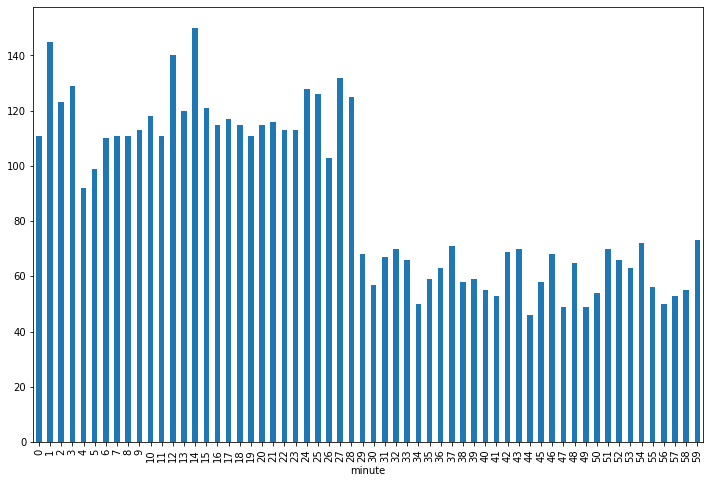

In [171]:
user_vs_minute_pivot.sum(axis = 1).plot.bar(figsize = (12, 8))

В левой части графика значения примерно вполовину больше значений в правой части графика

In [172]:
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


Можно заметить, что в колонку minute помещается только минутная часть от даты

### Задание 7
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [173]:
# Преобразуем тип данных колонки date из строчного в дату

transaction_data_updated = transaction_data.astype({'date': 'datetime64'})

In [174]:
# Заметим, что данные представлены за полтора часа одних суток. Это значит, что учесть нужно только часы и минуты.

transaction_data_updated['date'].min()

Timestamp('2020-03-02 00:00:00')

In [175]:
transaction_data_updated['date'].max()

Timestamp('2020-03-02 01:29:05')

In [176]:
# Сохраним в новую колонку число минут, учитывая часы

transaction_data_updated['true_minute'] = transaction_data_updated['date'].dt.hour * 60 + transaction_data_updated['date'].dt.minute

In [178]:
transaction_data_updated

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

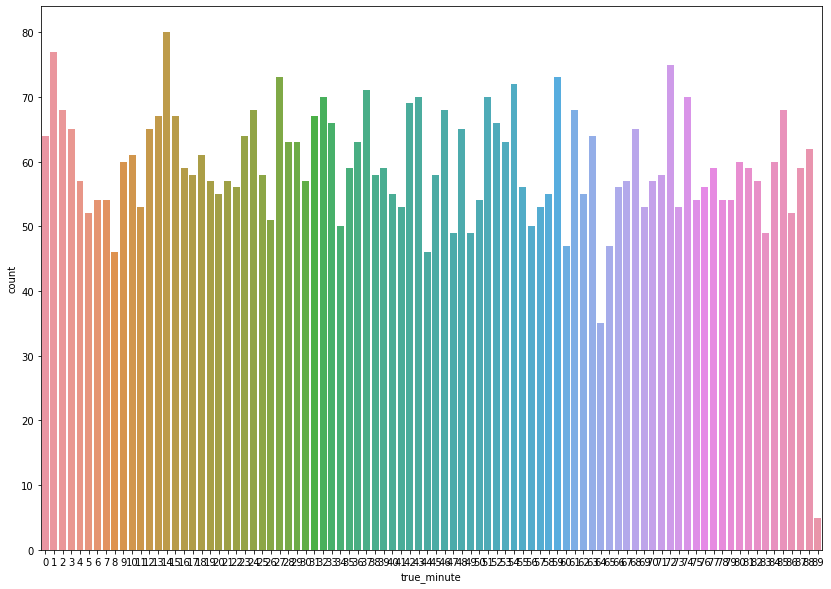

In [183]:
# Теперь посмотрим на график после исправления ошибки

plt.figure(figsize=(14, 10))
sns.countplot(transaction_data_updated.true_minute)